In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
df_2018 = pd.read_csv('dallas_solar_energy_2018.csv',parse_dates=[0], index_col=0)
df_2019 = pd.read_csv('dallas_solar_energy_2019.csv',parse_dates=[0], index_col=0)
df_2020 = pd.read_csv('dallas_solar_energy_2020.csv',parse_dates=[0], index_col=0)
weather = df_2018.append(df_2019, ignore_index=True)

C:\Users\sswarupa\AppData\Local\Temp\1\ipykernel_9052\1782129138.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather = df_2018.append(df_2019, ignore_index=True)


In [3]:
weather.loc[weather.index == '2018-01-01 00:00:00', :]

,air_temperature,alpha,aod,asymmetry,cld_opd_dcomp,cld_reff_dcomp,clearsky_dhi,clearsky_dni,clearsky_ghi,cloud_press_acha,...,ghi,ozone,relative_humidity,solar_zenith_angle,ssa,surface_albedo,surface_pressure,total_precipitable_water,wind_direction,wind_speed


In [4]:
# all rows but your first column will be excluded
weather1 = weather.iloc[:,1:]  
# get column headings
labels = weather.iloc[:,0]

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(weather1, labels, test_size = 0.2, random_state = 25)

In [6]:
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

In [7]:
Model1 = LinearRegression()
Model1.fit(train_data, train_labels)
Pred1 = Model1.predict(test_data)

In [8]:
# Evaluation
mae_list.append(metrics.mean_absolute_error(test_labels, Pred1))
mse_list.append(metrics.mean_squared_error(test_labels, Pred1))
rmse_list.append(np.sqrt(metrics.mean_squared_error(test_labels, Pred1)))
r2_list.append(metrics.r2_score(test_labels, Pred1))

print('MAE : ', mean_absolute_error(test_labels, Pred1))
print('MSE : ', mean_squared_error(test_labels, Pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, Pred1)))
print('R^2 : ', r2_score(test_labels, Pred1))

MAE :  0.25100800959621816
MSE :  0.13662121115971557
RMSE: 0.3696230663252979
R^2 :  0.9986743767278233


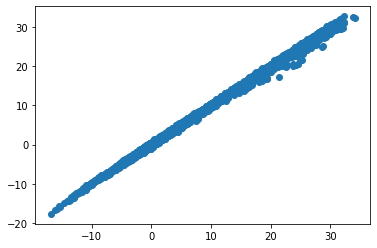

In [9]:
plt.scatter(test_labels,Pred1)

In [10]:
Model2 = RandomForestRegressor(max_depth = None, n_estimators = 500, max_features='auto')
Model2.fit(train_data, train_labels)
Pred2 = Model2.predict(test_data)

In [11]:
# Evaluation
mae_list.append(mean_absolute_error(test_labels, Pred2))
mse_list.append(mean_squared_error(test_labels, Pred2))
rmse_list.append(np.sqrt(metrics.mean_squared_error(test_labels, Pred2)))
r2_list.append(r2_score(test_labels, Pred2))

print('MAE : ', mean_absolute_error(test_labels, Pred2 ))
print('MSE : ', mean_squared_error(test_labels, Pred2 ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, Pred2)))
print('R^2 : ', r2_score(test_labels, Pred2 ))

MAE :  0.05514788812785361
MSE :  0.00875243576484004
RMSE: 0.09355445347411336
R^2 :  0.9999150759062988


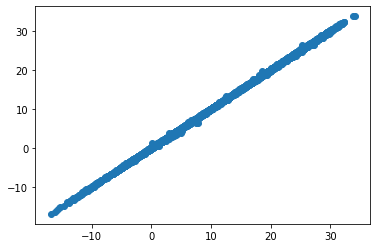

In [12]:
plt.scatter(test_labels,Pred2)

In [13]:
Model3 = XGBRegressor(objective = 'reg:squarederror',
                      colsample_bytree=0.8, gamma=0,
                      max_depth=9, min_child_weight=4,
                      subsample=0.8)
Model3.fit(train_data, train_labels)
Pred3 = Model3.predict(test_data)

In [14]:
mae_list.append(mean_absolute_error(test_labels, Pred3))
mse_list.append(mean_squared_error(test_labels, Pred3))
rmse_list.append(np.sqrt(metrics.mean_squared_error(test_labels, Pred3)))
r2_list.append(r2_score(test_labels, Pred3))

print('MAE : ', mean_absolute_error(test_labels, Pred3 ))
print('MSE : ', mean_squared_error(test_labels, Pred3 ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, Pred3)))
print('R^2 : ', r2_score(test_labels, Pred3 ))

MAE :  0.38456075023961406
MSE :  0.3437105852083646
RMSE: 0.5862683559670986
R^2 :  0.9966650072358603


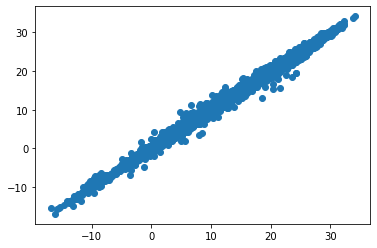

In [15]:
plt.scatter(test_labels,Pred3)

In [16]:
Model4 = DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_split=4, random_state=1)
Model4.fit(train_data, train_labels)
Pred4 = Model4.predict(test_data)

In [17]:
mae_list.append(mean_absolute_error(test_labels, Pred4))
mse_list.append(mean_squared_error(test_labels, Pred4))
rmse_list.append(np.sqrt(metrics.mean_squared_error(test_labels, Pred4)))
r2_list.append(r2_score(test_labels, Pred4))

print('MAE : ', mean_absolute_error(test_labels, Pred4 ))
print('MSE : ', mean_squared_error(test_labels, Pred4 ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, Pred4)))
print('R^2 : ', r2_score(test_labels, Pred4 ))


MAE :  0.2558845308129179
MSE :  0.12121716332628892
RMSE: 0.3481625530212704
R^2 :  0.9988238408126486


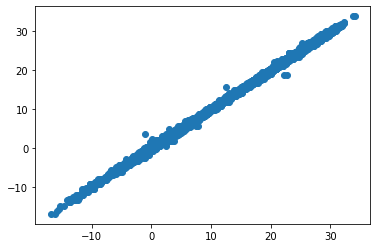

In [18]:
plt.scatter(test_labels,Pred4)

In [19]:
print('      LinearRegression      RandomForest        XGBoost         DecisionTrees')
print('MAE',mae_list)
print('MSE',mse_list)
print('RMSE',rmse_list)
print('R2',r2_list)

      LinearRegression      RandomForest        XGBoost         DecisionTrees
MAE [0.25100800959621816, 0.05514788812785361, 0.38456075023961406, 0.2558845308129179]
MSE [0.13662121115971557, 0.00875243576484004, 0.3437105852083646, 0.12121716332628892]
RMSE [0.3696230663252979, 0.09355445347411336, 0.5862683559670986, 0.3481625530212704]
R2 [0.9986743767278233, 0.9999150759062988, 0.9966650072358603, 0.9988238408126486]


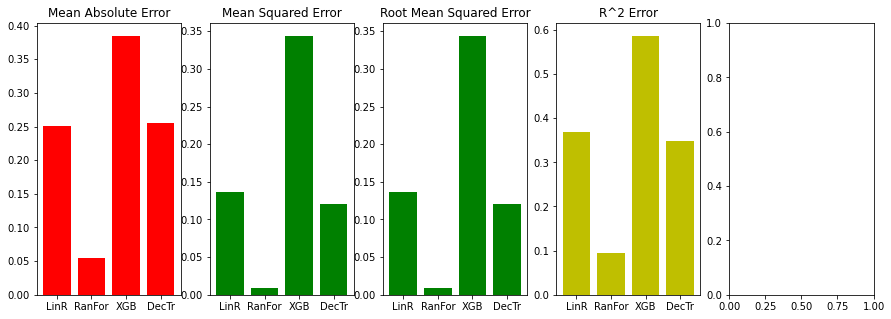

In [20]:
plot_labels = ["LinR", "RanFor", "XGB", "DecTr"]
from math import sqrt

f, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1,ncols=5,figsize=(15,5))
ax1.bar(plot_labels,mae_list,color='r')
ax1.set_title("Mean Absolute Error")
ax2.bar(plot_labels,mse_list,color='g')
ax2.set_title("Mean Squared Error")
ax3.bar(plot_labels,mse_list,color='g')
ax3.set_title("Root Mean Squared Error")
ax4.bar(plot_labels,rmse_list,color='y')
ax4.set_title("R^2 Error")
import operator

In [21]:
#IMPORTS
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import pylab as py
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from joblib import dump, load

In [22]:
#Time for Polynomial Fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, median_absolute_error
from sklearn.preprocessing import power_transform

In [23]:
def logify_df(df):
    df['DHI_log'] = np.log(df['dhi'])
    df['GHI_log'] = np.log(df['ghi'])
    df['cloud_type_log'] = np.log(df['cloud_type']+0.0000001)
    return df

In [24]:
def make_df_nonzero(df):
    df_no_zero = df.loc[df['dhi']!= 0 ]
    assert len(df_no_zero['dhi'])==len(df_no_zero['ghi']), "Some DHI 0s where GHI is not 0"
    print(df_no_zero)
    return df_no_zero 

In [25]:
def seasonize(df):
    seasons = []
    for month in df['month']:
        if month in [12,1,2,3]:
            seasons.append('Winter')
        elif month in [4,5,6]:
            seasons.append('Spring')
        elif month in [7,8,9]:
            seasons.append('Summer')
        else:
            seasons.append('Fall')
    df['Season'] = pd.Series(seasons)
    return df

In [26]:
def meta_visualization(data, x='ghi', y='dhi', z='cloud_type'):
    sns.lmplot(x, y, data=data, hue=z, fit_reg=False)
    plt.show()
    return

In [27]:
def segment_visualization(data, x='ghi', y='dhi', z='cloud_type'):
    sns.lmplot(x, y, data=data, hue=z, row=z, fit_reg=True)
    plt.show()
    return

In [28]:
def featureHistograms(df, features=['ghi','dhi','cloud_type'],):
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(ncols=len(features))
    for i in range(len(features)):
        sns.distplot(df[features[i]], ax=axs[i])

In [29]:
def three_dee_viz(x,y,z,preds=[]):
    #3d viz
    fig = pyplot.figure()
    ax = Axes3D(fig)
    ax.set(xlabel='arg1', ylabel='arg2', zlabel='arg3')
    ax.scatter(x,y,z)
    if any(preds):
        ax.scatter(x, preds,z)
    plt.show()

In [30]:
def resids_viz(actuals, predictions):
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(ncols=2)
    residuals = actuals - predictions
    sm.qqplot(residuals, line='45', ax=axs[0])
    sns.regplot(x=predictions, y=residuals, ax=axs[1], label="Residual vs fitted")
    axs[1].set(xlabel='Fitted', ylabel='Residuals')

In [31]:
def make_OLS(X, Y):
    ols_model = LinearRegression().fit(X, Y)
    r2 = ols_model.score(X, Y)
    print("r2 is ", r2)
    return ols_model, r2

In [32]:
def show_model_metrics(X, Y, model):
    preds = model.predict(X)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    print("mean squared log error is ", mean_squared_log_error(Y, preds))
    print("median absolute error is ", median_absolute_error(Y, preds))
    print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [33]:
def show_model_metrics_logBackTrans(X, Y, model):
    preds = model.predict(X)
    preds = np.exp(preds)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("******LOG BACK TRANSFORMED METRICS")
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    print("mean squared log error is ", mean_squared_log_error(Y, preds))
    print("median absolute error is ", median_absolute_error(Y, preds))
    print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [34]:
#Zeros are removed because it ends up recording hours of night time data
#We dont need to record when sunlight is 0
weather = make_df_nonzero(weather)
logify_df(weather)

       air_temperature  alpha     aod  asymmetry  cld_opd_dcomp  \
25               -13.7   1.08  0.0258       0.61           1.32   
26               -13.0   1.09  0.0254       0.61           1.97   
27               -12.0   1.09  0.0254       0.61           1.97   
28               -11.0   1.10  0.0256       0.61           1.97   
29               -10.4   1.10  0.0256       0.61           1.87   
...                ...    ...     ...        ...            ...   
35031              6.8   1.41  0.0722       0.61           8.47   
35032              6.4   1.42  0.0632       0.61           0.00   
35033              5.6   1.42  0.0632       0.61           0.00   
35034              4.8   1.40  0.0585       0.61           3.20   
35035              4.7   1.40  0.0585       0.61           2.37   

       cld_reff_dcomp  clearsky_dhi  clearsky_dni  clearsky_ghi  \
25              14.44          16.0         227.0          21.0   
26              21.66          31.0         532.0          83

,air_temperature,alpha,aod,asymmetry,cld_opd_dcomp,cld_reff_dcomp,clearsky_dhi,clearsky_dni,clearsky_ghi,cloud_press_acha,...,solar_zenith_angle,ssa,surface_albedo,surface_pressure,total_precipitable_water,wind_direction,wind_speed,DHI_log,GHI_log,cloud_type_log
25,-13.7,1.08,0.0258,0.61,1.32,14.44,16.0,227.0,21.0,556.0,...,88.80,0.89,0.87,1027.0,0.2,332.0,3.5,2.484907,2.639057,1.386294
26,-13.0,1.09,0.0254,0.61,1.97,21.66,31.0,532.0,83.0,839.0,...,84.37,0.89,0.87,1028.0,0.2,332.0,3.5,3.583519,3.970292,1.386294
27,-12.0,1.09,0.0254,0.61,1.97,21.66,42.0,691.0,161.0,859.0,...,80.05,0.89,0.87,1028.0,0.2,331.0,3.7,4.007333,4.718499,1.386294
28,-11.0,1.10,0.0256,0.61,1.97,21.66,51.0,787.0,240.0,872.0,...,76.07,0.89,0.87,1028.0,0.2,331.0,3.9,4.248495,5.170484,1.386294
29,-10.4,1.10,0.0256,0.61,1.87,22.55,58.0,847.0,313.0,905.0,...,72.51,0.89,0.87,1028.0,0.2,330.0,3.9,4.356709,5.480639,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35031,6.8,1.41,0.0722,0.61,8.47,7.00,63.0,716.0,275.0,705.0,...,72.75,0.93,0.08,1002.0,1.0,252.0,2.6,4.605170,4.736198,1.386294
35032,6.4,1.42,0.0632,0.61,0.00,0.00,54.0,652.0,208.0,0.0,...,76.32,0.93,0.08,1002.0,1.0,250.0,2.5,4.189655,5.159055,-16.118096
35033,5.6,1.42,0.0632,0.61,0.00,0.00,44.0,546.0,136.0,0.0,...,80.32,0.93,0.08,1002.0,1.1,248.0,2.5,3.784190,4.912655,-16.118096
35034,4.8,1.40,0.0585,0.61,3.20,5.95,30.0,381.0,66.0,781.0,...,84.65,0.93,0.08,1002.0,1.2,247.0,2.4,3.496508,3.737670,1.386294


C:\Users\sswarupa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sswarupa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sswarupa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

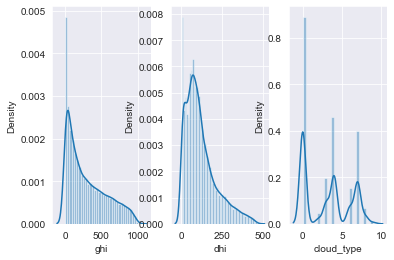

In [35]:
#Take a look at data distribution
featureHistograms(weather)

C:\Users\sswarupa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sswarupa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sswarupa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

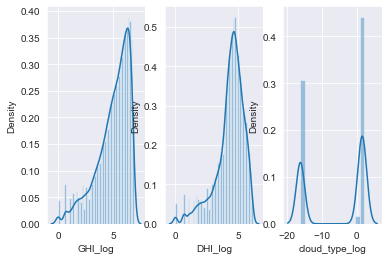

In [36]:
#Take a look at data distribution in logs
# sns.set_style('darkgrid')
# fig, axs = plt.subplots(ncols=3)
# sns.distplot(df1_2018['Cloud Cover'], ax=axs[0])
# sns.distplot(df1_2018['GHI_log'], ax=axs[1])
# sns.distplot(df1_2018['DHI_log'], ax=axs[2])

featureHistograms(weather, ['GHI_log', 'DHI_log', 'cloud_type_log'])

C:\Users\sswarupa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


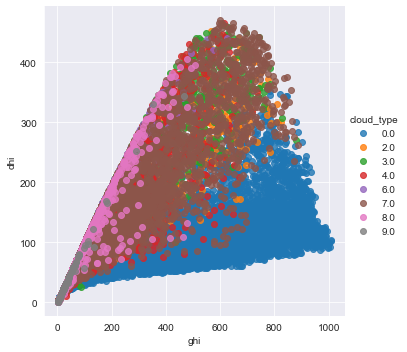

In [37]:
#See the overall data
meta_visualization(weather, x='ghi', y='dhi', z='cloud_type')

C:\Users\sswarupa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


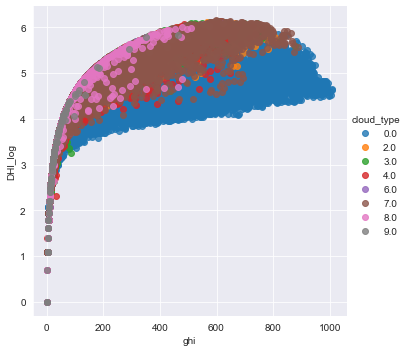

In [38]:
# Polynomial fit with log transform of response
meta_visualization(weather, x='ghi', y='DHI_log', z='cloud_type')

In [39]:
#Need to fit some poly stuff
#first create X feature vector of [GHI, Cloud type]
_GHI = weather['ghi'].values
_Cloud_type = weather['cloud_type'].values
_X = np.array(list(zip(_GHI, _Cloud_type)))

In [40]:
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(_X)
_DHI_log = weather['DHI_log']

In [41]:
clf_poly = linear_model.LinearRegression()
clf_poly.fit(X_poly, _DHI_log)

LinearRegression()

In [42]:
print(clf_poly.coef_)

[ 0.00000000e+00  3.68468504e-02 -3.57463673e-02 -1.89542755e-04
  5.01000914e-03 -4.28894897e-02  4.34697031e-07 -7.74844390e-06
 -1.29546043e-03  3.47602125e-02 -4.44304409e-10  7.22359669e-09
  9.74269192e-07  1.36494168e-04 -6.47685682e-03  1.65986439e-13
 -4.78667695e-12  1.56273033e-10 -8.59576558e-08 -3.63727259e-06
  3.53330374e-04]


In [43]:
predictions_poly = show_model_metrics(X_poly, _DHI_log, clf_poly)[0]

rmse is  0.3723070046670835
r2 is  0.8915935146707856
mean absolute error is  0.2803238801071611
mean squared log error is  0.014027933458688767
median absolute error is  0.23460986230879266
MAPE is  inf


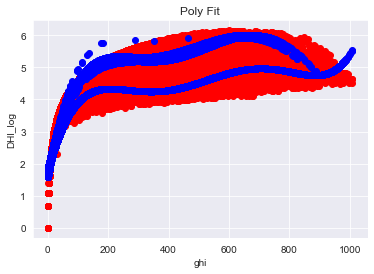

In [44]:
def viz_linear():
    plt.scatter(_GHI, _DHI_log, color='red')
    plt.scatter(_GHI, predictions_poly, color='blue')
#     plt.plot(_ghi_poly_sorted, preds_poly_sorted, 's', color='blue')
    plt.title('Poly Fit')
    plt.xlabel('ghi')
    plt.ylabel('DHI_log')
    plt.show()
    return
viz_linear()

C:\Users\sswarupa\AppData\Local\Temp\1\ipykernel_9052\3902930581.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


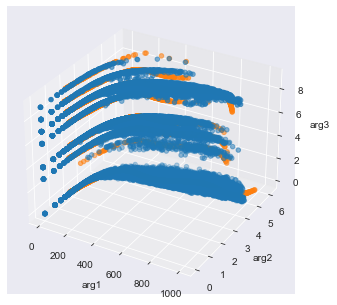

In [45]:
#3D visualizations
three_dee_viz(_GHI, _DHI_log, weather['cloud_type'], predictions_poly )

In [46]:
#Baack transform
preds_back_transformed = np.exp(predictions_poly)
_DHI = weather['dhi']
actuals = _DHI.values

print("mean absolute error is ",mean_absolute_error(actuals,preds_back_transformed))
print("mean squared log error is ", mean_squared_log_error(actuals, preds_back_transformed))
print("median absolute error is ", median_absolute_error(actuals, preds_back_transformed))
print("MAPE is ", np.mean(np.abs((actuals - preds_back_transformed) / actuals)) * 100)

mean absolute error is  28.403779699645476
mean squared log error is  0.11750746539464016
median absolute error is  14.77523717020766
MAPE is  31.777210425265253


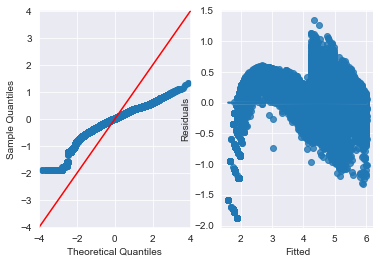

In [47]:
# Lets see how our residuals hold up, lets see if we can wrangle this data
## QQplot and residuals vs. fitted
resids_viz(_DHI_log, predictions_poly)
#Residuals are not very normal, not great, not terrible
#model fit is pretty good

In [48]:
#Use stats models on original data

exog = list(zip(weather['GHI_log'].values, weather['cloud_type'].values))
endog = weather['DHI_log'].values
data_exog = sm.add_constant(exog)
ols_resid = sm.OLS(endog, exog).fit().resid

res_fit = sm.OLS(ols_resid[1:], ols_resid[:-1]).fit()
rho = res_fit.params
print(rho)
# rho is a consistent estimator of the correlation of the residuals from an OLS fit of the data. It is assumed that this is the true rho of the AR process data.

[0.77676975]


In [49]:
from scipy.linalg import toeplitz
order = toeplitz(np.arange(len(weather)))
sigma = rho**order
# sigma is an n x n matrix of the autocorrelation structure of the data.

In [50]:
gls_model = sm.GLS(endog, exog, sigma=sigma)
gls_results = gls_model.fit()
print(gls_results.summary())

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            GLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          2.362e+05
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        14:34:47   Log-Likelihood:                          1965.9
No. Observations:               18170   AIC:                                     -3928.
Df Residuals:                   18168   BIC:                                     -3912.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
preds_gls = gls_results.predict()

In [52]:
print("mean absolute error is ",mean_absolute_error(endog,preds_gls))
print("mean squared log error is ", mean_squared_log_error(endog, preds_gls))
print("median absolute error is ", median_absolute_error(endog, preds_gls))
# print("MAPE is ", np.mean(np.abs((endog - preds_gls) / endog)) * 100)

mean absolute error is  0.40098145645353767
mean squared log error is  0.008014405879083388
median absolute error is  0.3772769745548614


In [53]:
#Backtransformed
preds_gls_backtrans = np.exp(preds_gls)
print("mean absolute error is ",mean_absolute_error(actuals,preds_gls_backtrans))
print("mean squared log error is ", mean_squared_log_error(actuals, preds_gls_backtrans))
print("median absolute error is ", median_absolute_error(actuals, preds_gls_backtrans))
print("MAPE is ", np.mean(np.abs((actuals - preds_gls_backtrans) / actuals)) * 100)

mean absolute error is  50.0084568005099
mean squared log error is  0.21898854041854113
median absolute error is  35.37225571263511
MAPE is  43.37459219696792
